Attempting to convert: 
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/autoencoder.py 
by mashing it up with: 
https://github.com/fastforwardlabs/vae-tf/blob/master/vae.py, the latter is oudated due to being written in a prior version of tensorflow. 

It seems like I was close the first time, I just added dropout and used the default learning rate fro AdamOptimizer as opposed to passing a learning rate. The model is now reproducing discernible numbers.

In [1]:
#Dependencies:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tf.__version__

'1.0.1'

In [3]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
#Functions
def sampleGaussian(mu, log_sigma):
    """(Differentiably!) draw sample from Gaussian with given shape, subject to random noise epsilon"""
    epsilon = tf.random_normal(tf.shape(log_sigma), name="epsilon")
    return mu + epsilon * tf.exp(log_sigma) # N(mu, I * sigma**2)

def crossEntropy(obs, actual, offset=1e-7):
    """Binary cross-entropy, per training example"""
    # (tf.Tensor, tf.Tensor, float) -> tf.Tensor
        # bound by clipping to avoid nan
    obs_ = tf.clip_by_value(obs, offset, 1 - offset)
    return -tf.reduce_sum(actual * tf.log(obs_) +
                          (1 - actual) * tf.log(1 - obs_), 1)
def kullbackLeibler(mu, log_sigma):
    # = -0.5 * (1 + log(sigma**2) - mu**2 - sigma**2)
    return -0.5 * tf.reduce_sum(1 + 2 * log_sigma - mu**2 -
                                tf.exp(2 * log_sigma), 1)

def plotSubset(x_in, x_reconstructed, n=10, cols=None, outlines=True,
               save=True, name="subset", outdir="."):
    """Util to plot subset of inputs and reconstructed outputs"""
    n = min(n, x_in.shape[0])
    cols = (cols if cols else n)
    rows = 2 * int(np.ceil(n / cols)) # doubled b/c input & reconstruction

    plt.figure(figsize = (cols * 2, rows * 2))
    dim = 28 # assume square images

    def drawSubplot(x_, ax_):
        plt.imshow(x_.reshape([dim, dim]), cmap="Greys")
        if outlines:
            ax_.get_xaxis().set_visible(False)
            ax_.get_yaxis().set_visible(False)
        else:
            ax_.set_axis_off()

    for i, x in enumerate(x_in[:n], 1):
        # display original
        ax = plt.subplot(rows, cols, i) # rows, cols, subplot numbered from 1
        drawSubplot(x, ax)

    for i, x in enumerate(x_reconstructed[:n], 1):
        # display reconstruction
        ax = plt.subplot(rows, cols, i + cols * (rows / 2))
        drawSubplot(x, ax)

    plt.show()


In [5]:
#Architecture variables
encode_architecture = [600, 400, 200, 50]
decode_architecture = [200, 400, 600, 784]
nonlinearity = tf.nn.relu
squashing = tf.nn.sigmoid
batch_size = 128
plots_outdir="./png"

In [9]:
#Placeholders
x_in = tf.placeholder(tf.float32, (None, 784 ))
drop = tf.placeholder(tf.float32, None)
#todo, implement dropout

#encoding layers
enc_layer_1 = tf.layers.dense(x_in, encode_architecture[0], activation=nonlinearity) 
enc_layer_1 = tf.layers.dropout(enc_layer_1, rate=drop)
enc_layer_2 = tf.layers.dense(enc_layer_1, encode_architecture[1], activation=nonlinearity) 
enc_layer_2 = tf.layers.dropout(enc_layer_2, rate=drop)
enc_layer_3 = tf.layers.dense(enc_layer_2, encode_architecture[2], activation=nonlinearity)
enc_layer_3 = tf.layers.dropout(enc_layer_3, rate=drop)


#mean and variance, sample gaussian
z_mean = tf.layers.dense(enc_layer_3, encode_architecture[-1], activation=nonlinearity)
z_log_sigma = tf.layers.dense(enc_layer_3, encode_architecture[-1], activation=nonlinearity)

z = sampleGaussian(z_mean, z_log_sigma)


#decoding layers
dec_layer_1 = tf.layers.dense(z, decode_architecture[0], activation=nonlinearity) 
dec_layer_1 = tf.layers.dropout(dec_layer_1, rate=drop)
dec_layer_2 = tf.layers.dense(dec_layer_1, decode_architecture[1], activation=nonlinearity) 
dec_layer_2 = tf.layers.dropout(dec_layer_2, rate=drop)
dec_layer_3 = tf.layers.dense(dec_layer_2, decode_architecture[2], activation=nonlinearity) 
dec_layer_3 = tf.layers.dropout(dec_layer_3, rate=drop)
x_prime = tf.layers.dense(dec_layer_3, decode_architecture[3], activation=squashing)


#loss functions
rec_loss = crossEntropy(x_prime, x_in)
kl_loss = kullbackLeibler(z_mean, z_log_sigma)

#todo regularization
cost = tf.reduce_mean(rec_loss + kl_loss)


In [10]:
optimizer = tf.train.AdamOptimizer().minimize(cost)

Iteration: 0 cost: 549.562805
Samples:


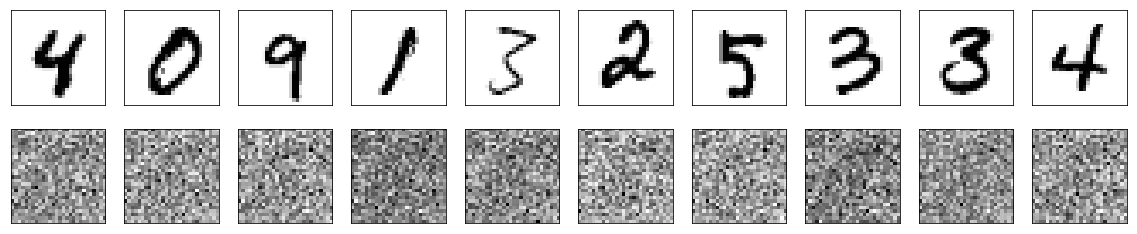

Iteration: 250 cost: 193.439117
Samples:


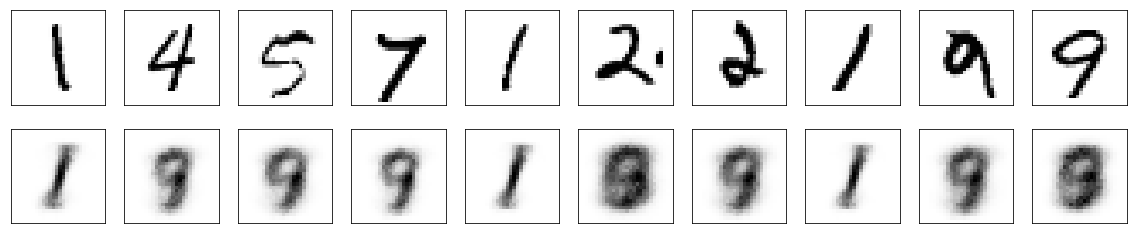

Iteration: 500 cost: 174.115234
Samples:


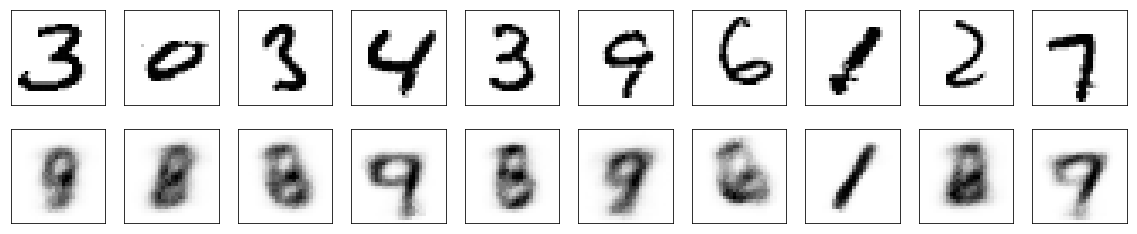

Iteration: 750 cost: 160.464005
Samples:


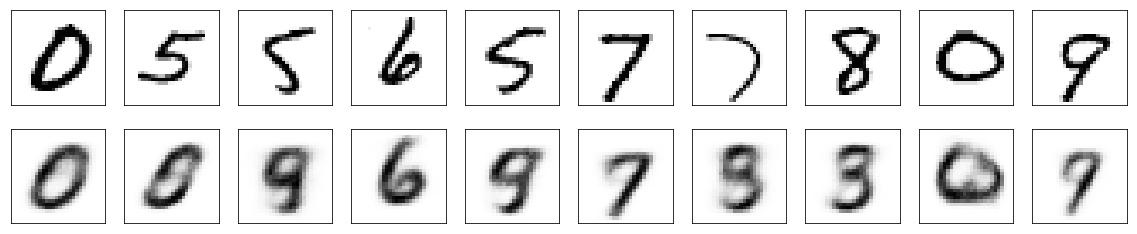

Iteration: 1000 cost: 159.974274
Samples:


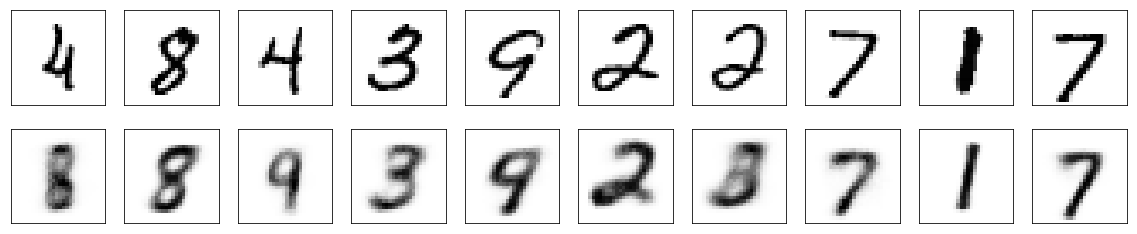

Iteration: 1250 cost: 163.955688
Samples:


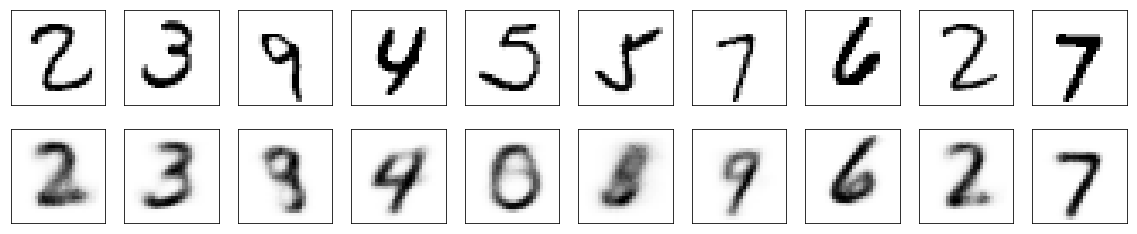

Iteration: 1500 cost: 146.295624
Samples:


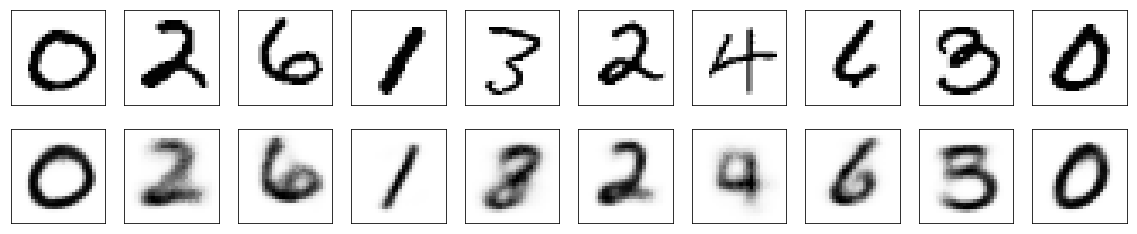

Iteration: 1750 cost: 143.522705
Samples:


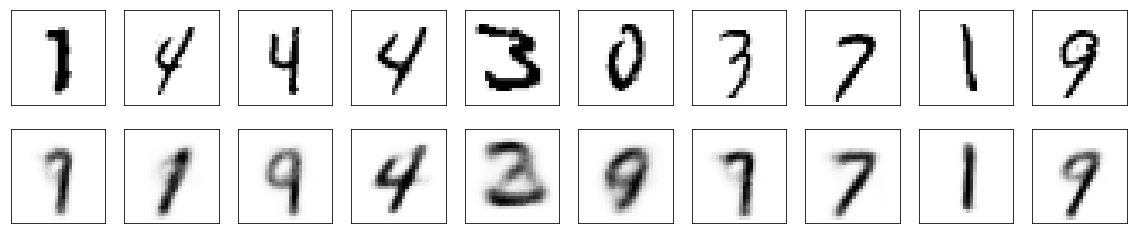

Iteration: 2000 cost: 155.153778
Samples:


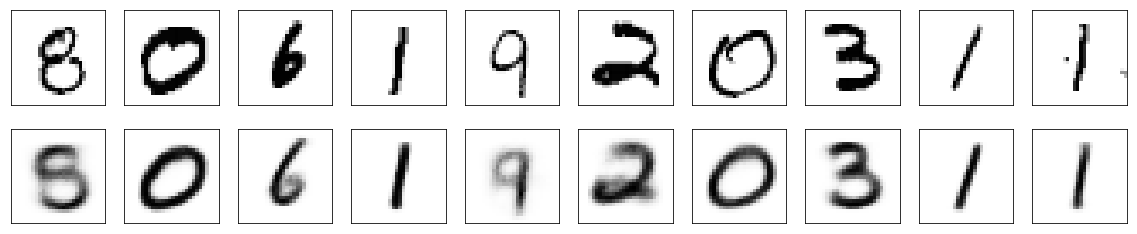

Iteration: 2250 cost: 147.076447
Samples:


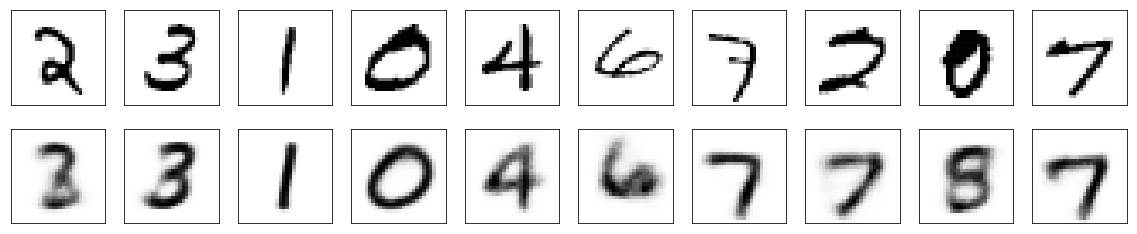

Iteration: 2500 cost: 142.985229
Samples:


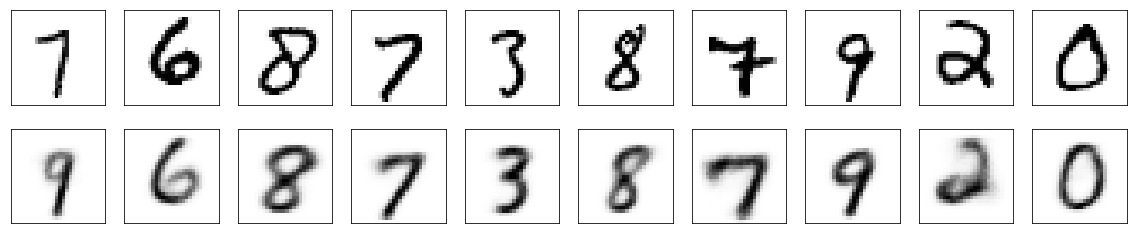

Iteration: 2750 cost: 140.951355
Samples:


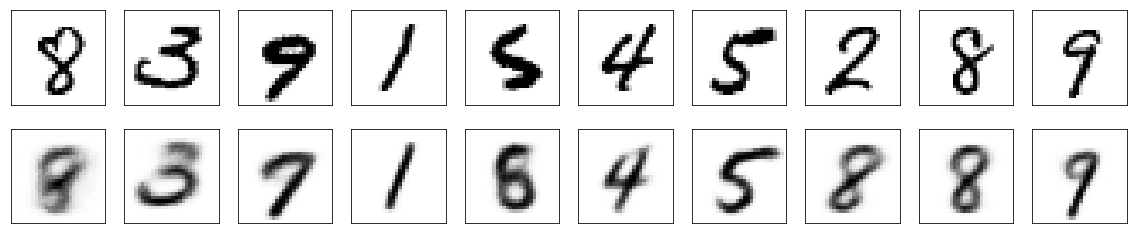

Iteration: 3000 cost: 152.605286
Samples:


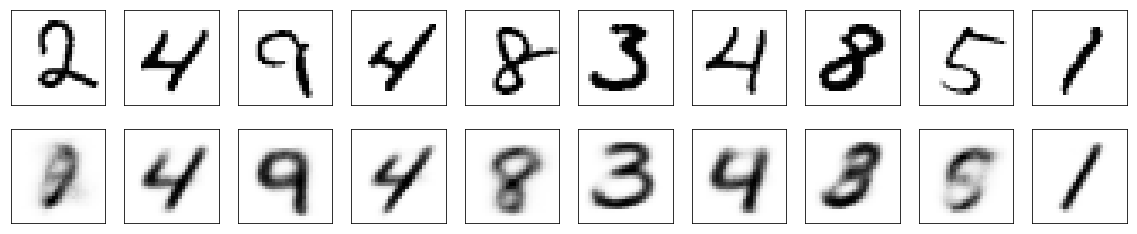

Iteration: 3250 cost: 141.713318
Samples:


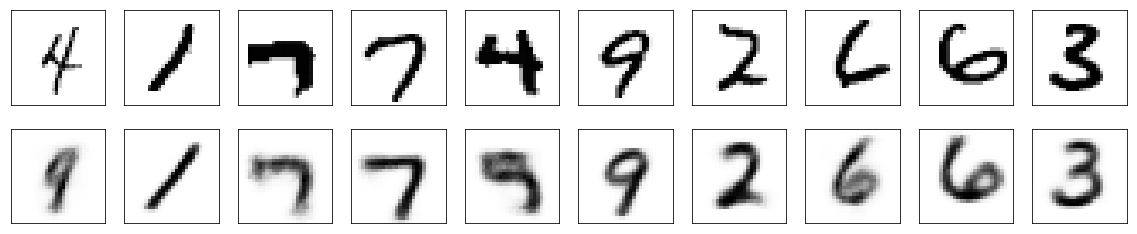

Iteration: 3500 cost: 147.540131
Samples:


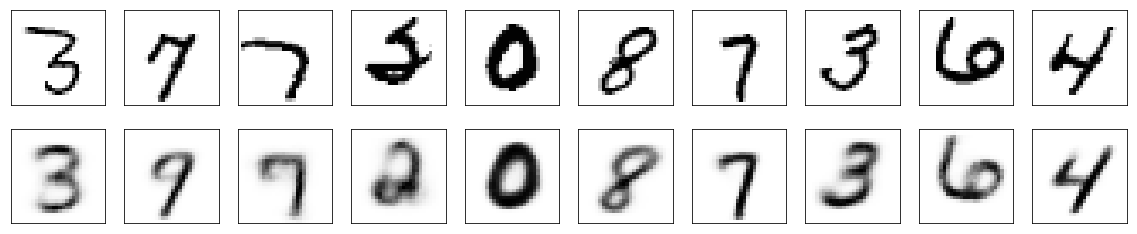

Iteration: 3750 cost: 138.650070
Samples:


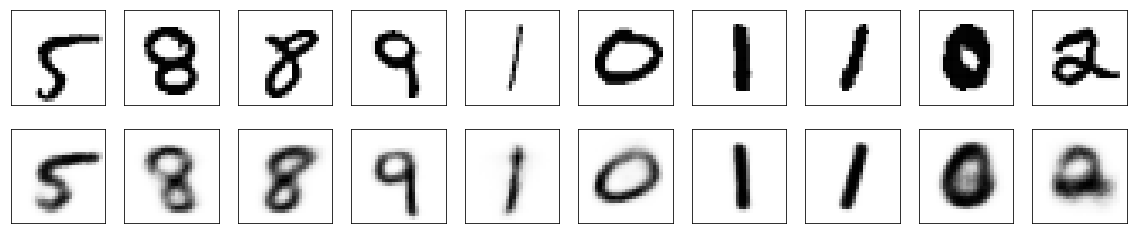

Iteration: 4000 cost: 140.710785
Samples:


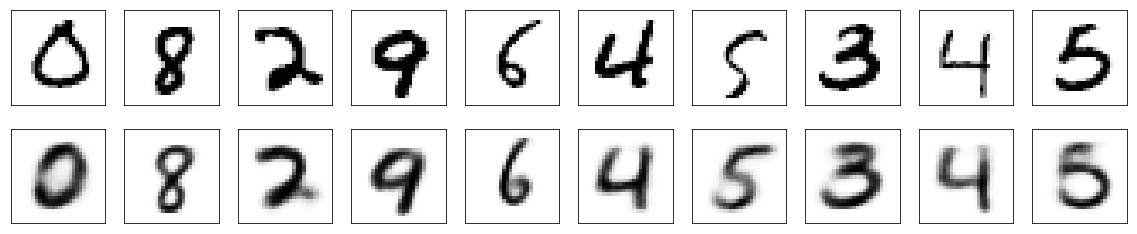

Iteration: 4250 cost: 148.740814
Samples:


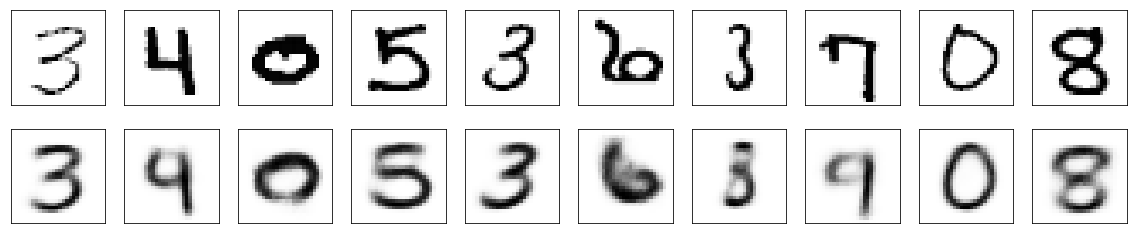

Iteration: 4500 cost: 143.868317
Samples:


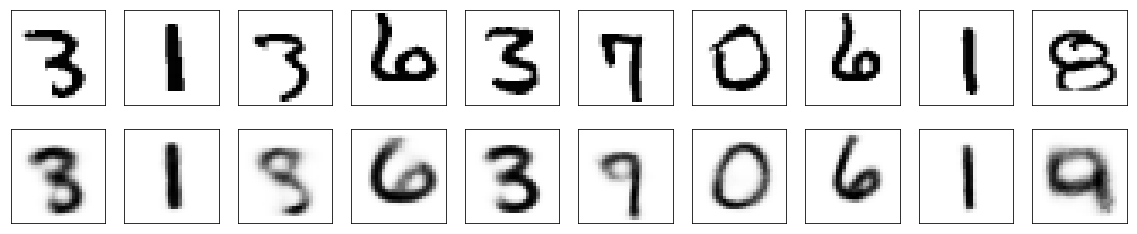

Iteration: 4750 cost: 144.255875
Samples:


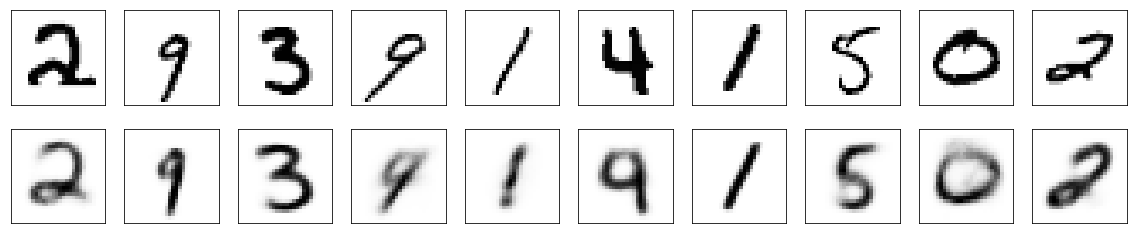

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        x, _= mnist.train.next_batch(batch_size)
        
        _, c = sess.run([optimizer, cost], feed_dict={x_in: x/1.})
        if i % 250 == 0:
            print("Iteration: %d cost: %f" %(i, c))

            print("Samples:")

            x2, _ = mnist.validation.next_batch(batch_size)
            feed_dict2 = {x_in: x2/1.}
            fetches2 = [x_prime, cost]
            x_prime2, cost2 = sess.run(fetches2, feed_dict2)
            plotSubset(x2, x_prime2, n=10, name="cv",
                            outdir=plots_outdir)

 